# Import the necessary libraries


In [2]:
import cv2
from glob import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.densenet import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
import os
import warnings
warnings.filterwarnings("ignore")


# Plot the sample images for all the classes 


# and Plot the distribution of images across the classes

healthy images


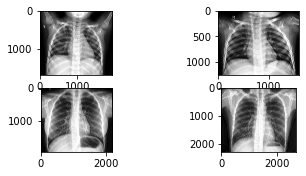

In [3]:
#sample image for the healthy class
import glob

img_healthy = [cv2.imread(file) for file in glob.glob('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/train/Healthy/*.jpeg')]
print('healthy images')
plt.subplot(321)
plt.imshow(img_healthy[0])

plt.subplot(322)
plt.imshow(img_healthy[1])

plt.subplot(323)
plt.imshow(img_healthy[6])

plt.subplot(323)
plt.imshow(img_healthy[12])

plt.subplot(324)
plt.imshow(img_healthy[20])

In [4]:
print(plt.rcParams["hist.bins"])

10


(array([799062., 570975., 595254., 565452., 596454., 573411., 592089.,
        578418., 587802., 608283.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

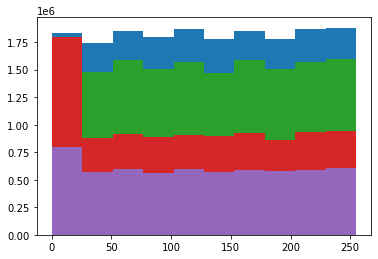

In [5]:
#Plot the distribution of images across the classes healthy
plt.hist(img_healthy[20].reshape(-1))
plt.hist(img_healthy[12].reshape(-1))
plt.hist(img_healthy[6].reshape(-1))
plt.hist(img_healthy[0].reshape(-1))
plt.hist(img_healthy[1].reshape(-1))

type 1 disease


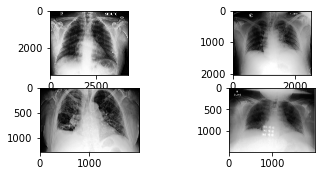

In [6]:
#sample image for the Type 1 disease

img_type1 = [cv2.imread(file) for file in glob.glob('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/train/Type 1 disease/*.jpeg')]
print('type 1 disease')
plt.subplot(321)
plt.imshow(img_type1[0])

plt.subplot(322)
plt.imshow(img_type1[1])

plt.subplot(323)
plt.imshow(img_type1[6])

plt.subplot(323)
plt.imshow(img_type1[12])

plt.subplot(324)
plt.imshow(img_type1[20])

(array([745791., 750222., 771003., 749778., 803733., 745569., 791448.,
        757200., 773442., 790974.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

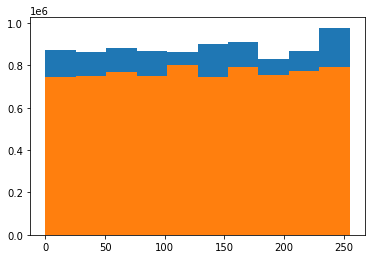

In [7]:
#Plot the distribution of images across the classes desease type 1
plt.hist(img_type1[20].reshape(-1))
plt.hist(img_type1[12].reshape(-1))
#plt.hist(img_type1[6].reshape(-1))
#plt.hist(img_type1[1].reshape(-1))


type 2 disease


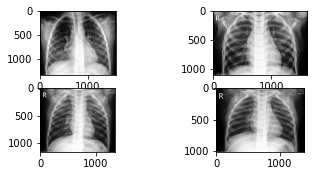

In [8]:
#sample image for the Type 2 disease

img_type2 = [cv2.imread(file) for file in glob.glob('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/train/Type 2 disease/*.jpeg')]
print('type 2 disease')
plt.subplot(321)
plt.imshow(img_type2[0])

plt.subplot(322)
plt.imshow(img_type2[1])

plt.subplot(323)
plt.imshow(img_type2[6])

plt.subplot(323)
plt.imshow(img_type2[12])

plt.subplot(324)
plt.imshow(img_type2[20])

(array([566730., 446553., 463527., 450699., 468459., 451404., 474360.,
        444477., 473295., 477936.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

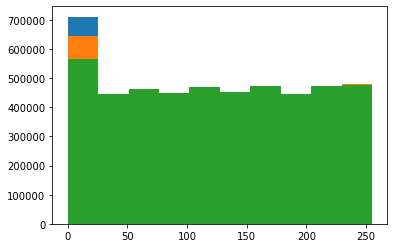

In [9]:
#Plot the distribution of images across the classes desease type 2
plt.hist(img_type2[20].reshape(-1))
plt.hist(img_type2[12].reshape(-1))
plt.hist(img_type2[6].reshape(-1))
#plt.hist(img_type2[1].reshape(-1))

# Build a data augmentation for train data to create new data with translation, rescale and flip, 
and rotation transformations. Rescale the image at 48x48

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=50,
                                   horizontal_flip=True,
                                   vertical_flip=True)


In [11]:
# loading the train data and test data
train_data = train_datagen.flow_from_directory('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/train',
                                               target_size = (48, 48),
                                               class_mode ='categorical')


Found 251 images belonging to 3 classes.


# Build a data augmentation for test data to create new data and rescale the image at 48x48


In [12]:
test_datagen = ImageDataGenerator()

In [13]:
test_data = test_datagen.flow_from_directory('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/test',
                                              target_size = (48, 48),
                                              class_mode ='categorical')

Found 66 images belonging to 3 classes.


# Read images directly from the train folder and test folder using the appropriate function


In [14]:
train_path = 'C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/train'
test_path = 'C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/test'

In [15]:
import glob #storage
train_images = []

for i in glob.glob('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/train/*/*.jpg'):
    n = cv2.imread(i)
    
    n1 = cv2.resize(n, (48,48))
    cv2.imwrite('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 2/data/train/*/'+str(i)+".jpg", n1)
    train_images.append(n1)

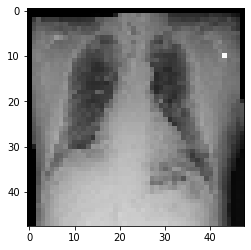

In [16]:
plt.imshow(train_images[0])

In [17]:
import glob #storage
test_images = []

for i in glob.glob('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 1/data/test/*/*.jpg'):
    n = cv2.imread(i)
    
    n1 = cv2.resize(n, (48,48))
    cv2.imwrite('C:/Users/Armand/Desktop/new work/Advance DL and computer vision/project/project 2/data/test/*/'+str(i)+".jpg", n1)
    test_images.append(n1)

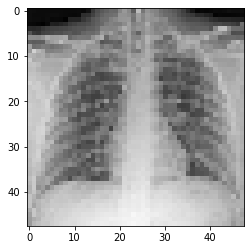

In [18]:
plt.imshow(test_images[0])

# Build 2 CNN model with:

CNN Architecture:

In [19]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (48, 48, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(axis=-1,momentum=0.1))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(axis=-1,momentum=0.1))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))


model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0

In [22]:
earlyStop=EarlyStopping(monitor="val_loss",patience=2, verbose = True)
history1 = model.fit_generator(train_data,epochs = 10,validation_data = test_data,verbose=True, callbacks=[earlyStop ]
                               )                   

Epoch 1/10
8/8 [==============================] - 14s 2s/step - loss: 0.3075 - accuracy: 0.9163 - val_loss: 3375.3398 - val_accuracy: 0.3939
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 0.3454 - accuracy: 0.8805 - val_loss: 2943.1970 - val_accuracy: 0.3939
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 0.3113 - accuracy: 0.8884 - val_loss: 3010.9468 - val_accuracy: 0.3939
Epoch 4/10
8/8 [==============================] - 13s 2s/step - loss: 0.2833 - accuracy: 0.8964 - val_loss: 4238.8496 - val_accuracy: 0.3939
Epoch 4: early stopping


# Plot the training and validation accuracy, and the loss

In [23]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

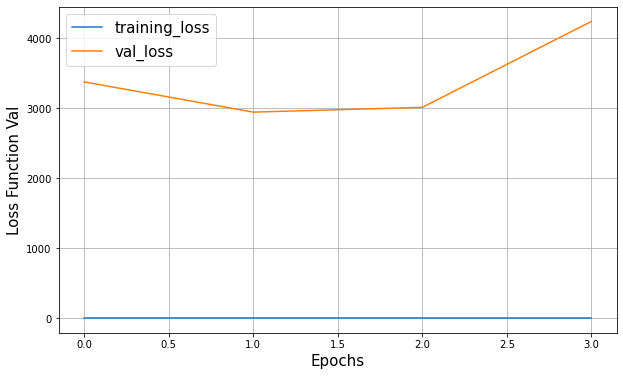

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history1.epoch, history1.history['loss'])
plt.plot(history1.epoch, history1.history['val_loss'])
plt.legend(['training_loss', 'val_loss'], fontsize=15)

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Function Val', fontsize=15)
plt.grid('on')
plt.show()

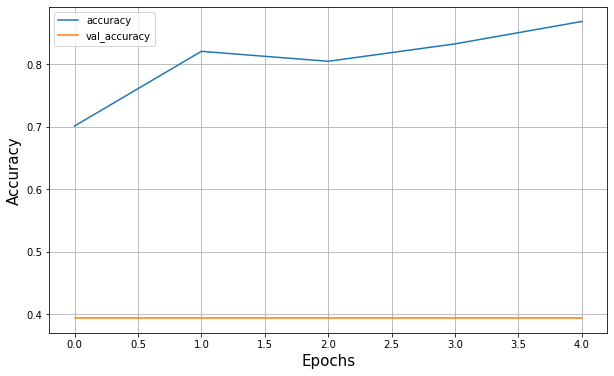

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history1.epoch, history1.history['accuracy'])
plt.plot(history1.epoch, history1.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid('on')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

In [ ]:
predictions = model.predict_generator(test_data)

In [ ]:
import sklearn.metrics as metrics
val_preds = np.argmax(predictions, axis=-1)
val_trues = test_data.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
print(cm)

[[26  0  0]
 [20  0  0]
 [20  0  0]]


# Transfer learning using mobile net:


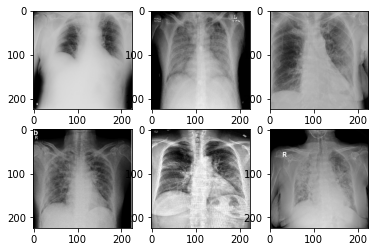

In [ ]:
import glob, random

img_list = glob.glob(os.path.join(train_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

# Prepare data for the pre-trained mobile net model, with color mode as RGB

In [ ]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

In [ ]:
test_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)



In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    seed=0
)

Found 251 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    seed=0
)

Found 66 images belonging to 3 classes.


In [ ]:
#Create an instance of a mobile net pre-trained model 


IMG_SHAPE = (224,224,3)
mobile = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [ ]:
mobile.trainable = True

In [ ]:
#Add dense layer, dropout layer, batch normalization layer on the pre-trained model

#Create a final output layer with a SoftMax activation function

model_2 = tf.keras.Sequential([
  mobile,
  tf.keras.layers.Conv2D(128,3,input_shape = (224,224, 3), activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.BatchNormalization(axis=-1,momentum=0.1),
  tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
#Take the loss function as categorical cross-entropy
#Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases

model_2.compile(optimizer='RMSprop',  
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Use early stopping with the patience of two epoch and call back function for preventing overfitting

#Try with ten numbers epoch

#Train the model using a generator and test the accuracy of the test data at every epoch


batch_size = 32
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
earlyStop=EarlyStopping(patience=2, verbose = True)
                  

history2 = model_2.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              validation_data=validation_generator, 
                              validation_steps=validation_steps,
                              callbacks=[earlyStop ])

Epoch 1/10
7/7 [==============================] - 35s 3s/step - loss: 2.5925 - accuracy: 0.4393 - val_loss: 6.5048 - val_accuracy: 0.4688
Epoch 2/10
7/7 [==============================] - 21s 3s/step - loss: 0.6770 - accuracy: 0.7589 - val_loss: 11.4626 - val_accuracy: 0.2188
Epoch 3/10
7/7 [==============================] - 21s 3s/step - loss: 0.6040 - accuracy: 0.7857 - val_loss: 15.2072 - val_accuracy: 0.3438
Epoch 3: early stopping


#  Plot the training and validation accuracy, and the loss

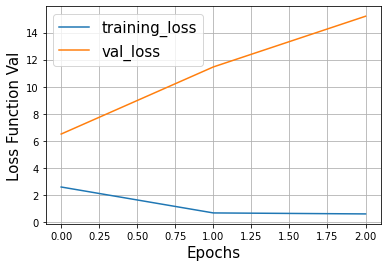

In [ ]:

plt.plot(history2.epoch, history2.history['loss'])
plt.plot(history2.epoch, history2.history['val_loss'])
plt.legend(['training_loss', 'val_loss'], fontsize=15)

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Function Val', fontsize=15)
plt.grid('on')
plt.show()

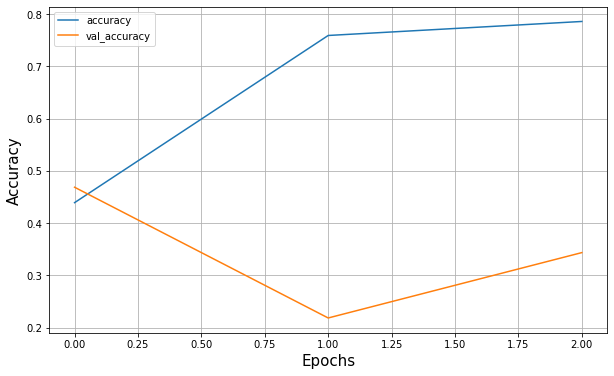

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history2.epoch, history2.history['accuracy'])
plt.plot(history2.epoch, history2.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid('on')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()

In [ ]:
predictions2 = model_2.predict_generator(validation_generator)

In [ ]:
import sklearn.metrics as metrics
val_preds2 = np.argmax(predictions2, axis=-1)
val_trues2 = test_data.classes
cm = metrics.confusion_matrix(val_trues2, val_preds2)
print(cm)

[[ 0 26  0]
 [ 0 20  0]
 [ 0 20  0]]
